In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ppxf_functions import (
    load_spectrum,
    process_spectrum,
    rebin_to_log,
    make_noise,
    calculate_velscale_fwhm,
    run_ppxf,
    plot_ppxf,
)

In [2]:
raw = np.load("../calibrated data/WB1_data.npy")       # rename your 2D array
waveem = np.load("../calibrated data/WB1_waveem.npy")

window_size = 5
step        = 1
scale       = 0.4   # arcsec per pixel

pix_min, pix_max = 150, 250   
results = []
raw_roi = raw[:, pix_min:pix_max]

for start in range(0, raw_roi.shape[1] - window_size + 1, step):
    end = start + window_size
    spectrum = raw_roi[:, start:end].sum(axis=1)

    # Build DataFrame for this spectrum
    df_spec = pd.DataFrame({
        "waveem": waveem,
        "flux":   spectrum
    })

    # Process, rebin, and run pPXF
    df_cut = process_spectrum(df_spec)
    noise = make_noise(df_cut)
    df_rb, lam, flux_rb, ln_w = rebin_to_log(df_cut)
    velscale, fwhm = calculate_velscale_fwhm(ln_w, lam)
    pp, gas_templates = run_ppxf(lam, fwhm, velscale, df_rb, noise)

    # Compute global center index
    center = start + window_size//2 + pix_min
    print(f'PIXEL: {center}')

    # Store center, rebinned DataFrame, and fit result
    results.append((center, df_rb, pp))


Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       -40         1
 comp.  1:      -113         1
 comp.  2:        -0       200
chi2/DOF: 0.7637; DOF: 1627; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 124; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      1.836       4.8    -113     1
Comp:  2           [NII]6583_d      0.000       8.5      -0   200
-----------------------------------------------------------------
pPXF fit done in 1.34 s
PIXEL: 152
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:       469       143
 comp.  1:      -232         1
 comp.  2:         0       200
chi2/DOF: 0.7973; DOF: 1627; degree = -1; mdegree = 10
method = capfit; Jac calls: 10; Func calls: 174; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      2.938       2.1    -232     1
Comp:  2           [NII]6583_d      0.000       3.7       0   200
-----------------------------------------------------------------
pPXF fit done in 1.43 s
PIXEL: 161
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       348       174
 comp.  1:      -188       154
 comp.  2:   

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:        34       617
 comp.  1:       161       275
 comp.  2:       -65         1
chi2/DOF: 0.7379; DOF: 1627; degree = -1; mdegree = 10
method = capfit; Jac calls: 8; Func calls: 140; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      2.117       1.9     161   275
Comp:  2           [NII]6583_d      1.165       1.5     -65     1
-----------------------------------------------------------------
pPXF fit done in 1.33 s
PIXEL: 171
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:      2000       701
 comp.  1:         7       177
 comp.  2:      -105       148
chi2/DOF: 0.9121; DOF: 1627; degree = -1; mdegree = 10
method = capfit; Jac calls: 9; Func calls: 159; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      4.612       2.9       7   177
Comp:  2           [NII]6583_d      2.792       3.4    -105   148
-----------------------------------------------------------------
pPXF fit done in 1.49 s
PIXEL: 180
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     -1197        42
 comp.  1:       -42       166
 comp.  2:    

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -302       473
 comp.  1:      -199        77
 comp.  2:      -163       202
chi2/DOF: 0.4169; DOF: 1627; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 104; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      2.274      0.50    -199    77
Comp:  2           [NII]6583_d      1.823      0.81    -163   202
-----------------------------------------------------------------
pPXF fit done in 0.89 s
PIXEL: 190
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:      -347       582
 comp.  1:        95       160
 comp.  2:        75       112
chi2/DOF: 0.2969; DOF: 1627; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 124; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      14.68      0.84      95   160
Comp:  2           [NII]6583_d      5.283      0.97      75   112
-----------------------------------------------------------------
pPXF fit done in 1.36 s
PIXEL: 199
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -466       642
 comp.  1:        89       155
 comp.  2:    

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       278       111
 comp.  1:       132       100
 comp.  2:        50         1
chi2/DOF: 0.8256; DOF: 1627; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 124; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      7.380       1.5     132   100
Comp:  2           [NII]6583_d      2.235       1.7      50     1
-----------------------------------------------------------------
pPXF fit done in 1.09 s
PIXEL: 209
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:      -108         1
 comp.  1:       106       133
 comp.  2:      -358       180
chi2/DOF: 0.7292; DOF: 1627; degree = -1; mdegree = 10
method = capfit; Jac calls: 9; Func calls: 158; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 2/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      9.237       2.4     106   133
Comp:  2           [NII]6583_d      0.000       3.4    -358   180
-----------------------------------------------------------------
pPXF fit done in 1.62 s
PIXEL: 218
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -133         1
 comp.  1:        72       129
 comp.  2:    

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       157         1
 comp.  1:      -392       152
 comp.  2:        -0       200
chi2/DOF: 0.8560; DOF: 1627; degree = -1; mdegree = 10
method = capfit; Jac calls: 9; Func calls: 157; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 2/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      13.03       5.8    -392   152
Comp:  2           [NII]6583_d      0.000       8.1      -0   200
-----------------------------------------------------------------
pPXF fit done in 1.76 s
PIXEL: 228
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:      -954       342
 comp.  1:       747         1
 comp.  2:         0       200
chi2/DOF: 1.091; DOF: 1627; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 111; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 1/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      0.000       30.     747     1
Comp:  2           [NII]6583_d      0.000       53.       0   200
-----------------------------------------------------------------
pPXF fit done in 0.84 s
PIXEL: 237
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     -2000       869
 comp.  1:       -93        65
 comp.  2:     

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      1669      1000
 comp.  1:         0       200
 comp.  2:        -0       200
chi2/DOF: 1.057; DOF: 1627; degree = -1; mdegree = 10
method = capfit; Jac calls: 4; Func calls: 71; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 2/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      0.000   1.1e+02       0   200
Comp:  2           [NII]6583_d      0.000   1.4e+02      -0   200
-----------------------------------------------------------------
pPXF fit done in 1.11 s
PIXEL: 247


Peak flux at 194 px


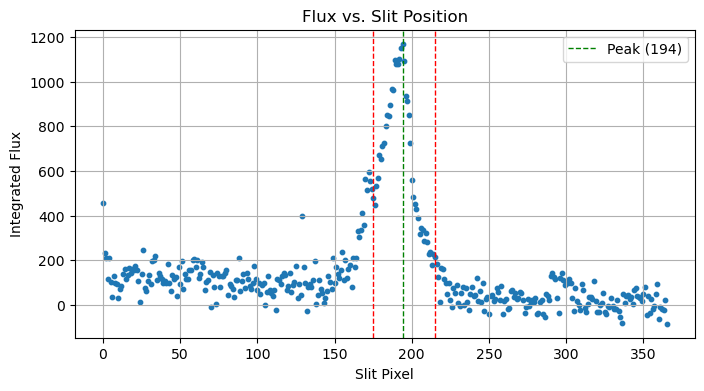

In [3]:
# raw.shape == (n_wave, n_spatial)
spatial_flux = raw.sum(axis=0)       # total flux in each slit column
slit_pixels  = np.arange(raw.shape[1])

# Only look between 150 and 250
search_range = slice(150, 251)
peak_rel = np.argmax(spatial_flux[search_range])
peak = slit_pixels[search_range][peak_rel]

print(f"Peak flux at {peak} px")

plt.figure(figsize=(8, 4))
plt.axvline(peak, color='green', linestyle='--', linewidth=1,
            label=f'Peak ({peak})')
plt.axvline(175, color='red', linestyle='--', linewidth=1)
plt.axvline(215, color='red', linestyle='--', linewidth=1)
plt.scatter(slit_pixels, spatial_flux, s=10)
plt.xlabel("Slit Pixel")
plt.ylabel("Integrated Flux")
plt.title("Flux vs. Slit Position")
plt.grid(True)
plt.legend()
plt.show()


Window centre: 177


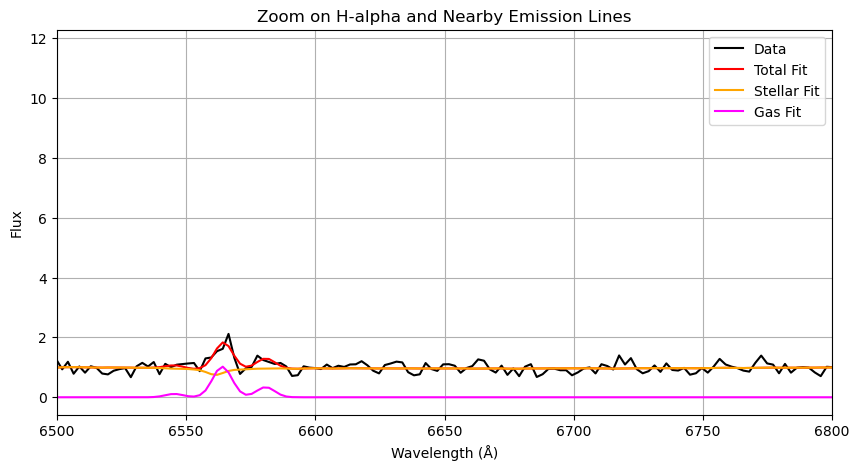

σ (km/s): 121.82

Window centre: 178


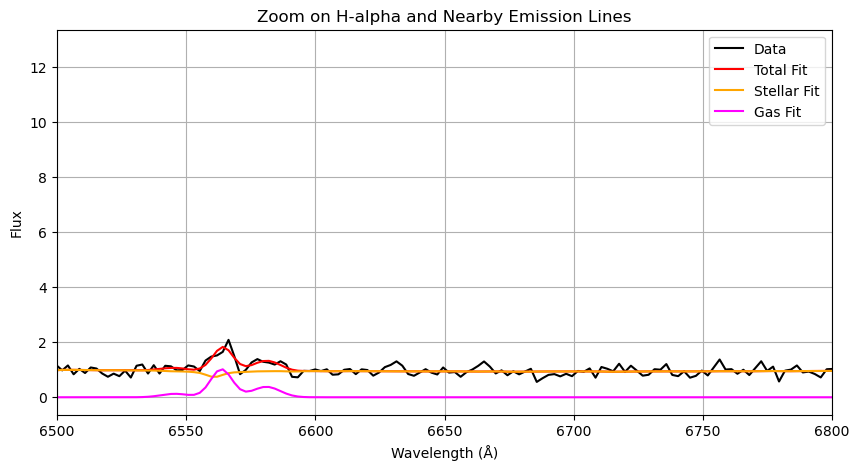

σ (km/s): 148.89

Window centre: 179


σ (km/s): 141.73

Window centre: 180


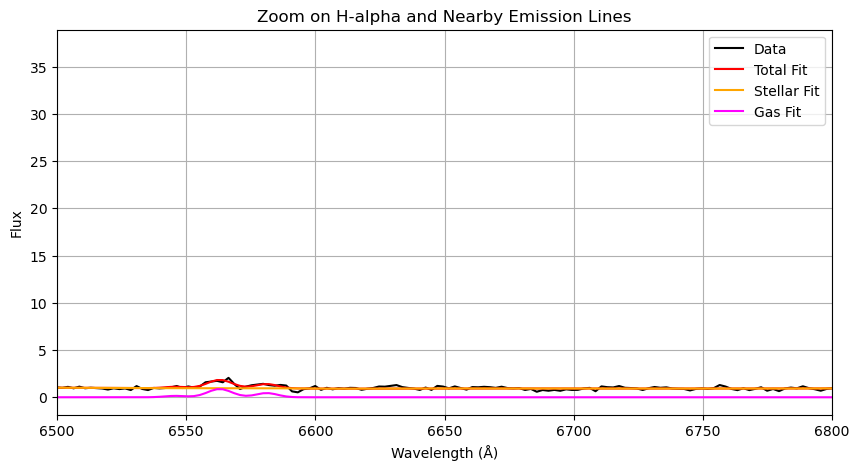

σ (km/s): 177.47

Window centre: 181


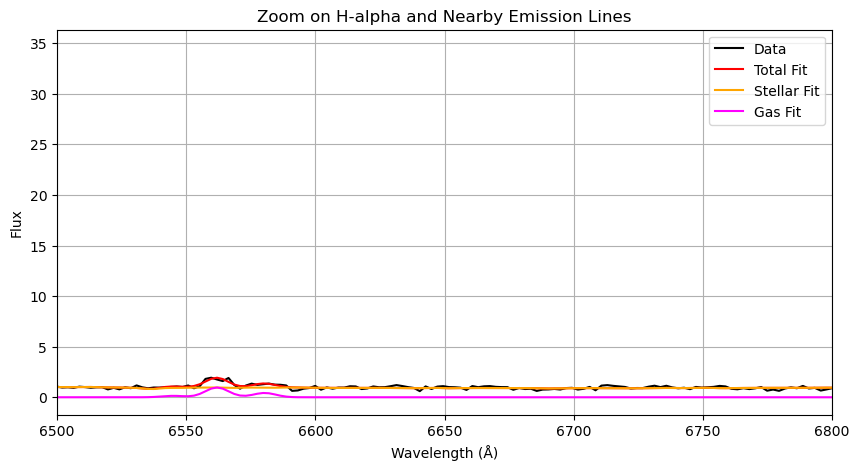

σ (km/s): 166.18

Window centre: 182


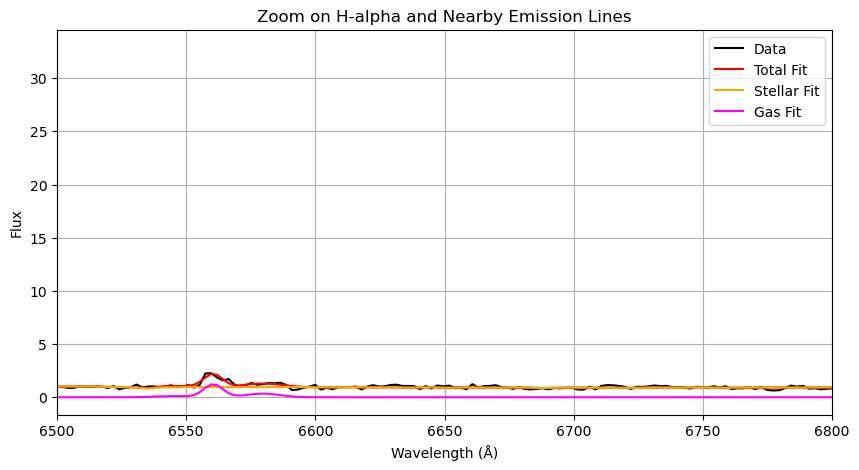

σ (km/s): 119.69

Window centre: 183


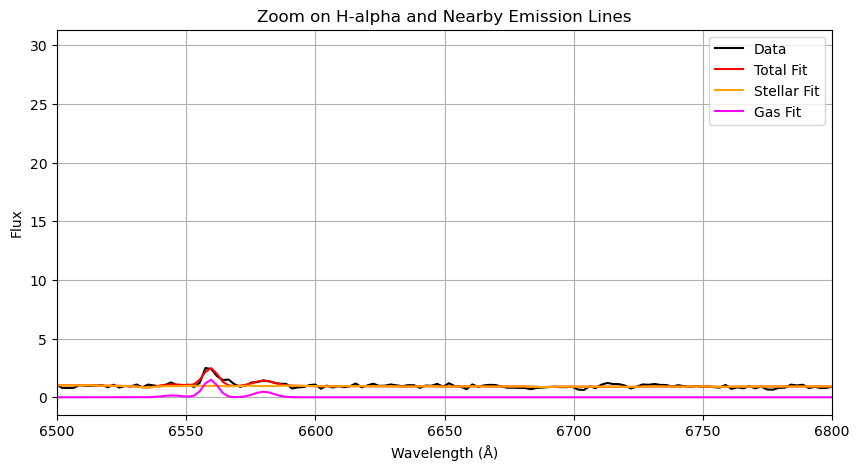

σ (km/s): 48.41

Window centre: 184


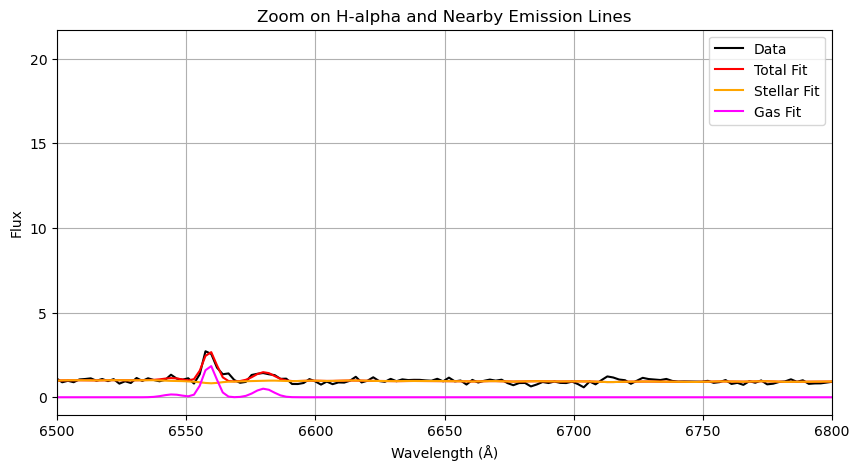

σ (km/s): 2.83

Window centre: 185


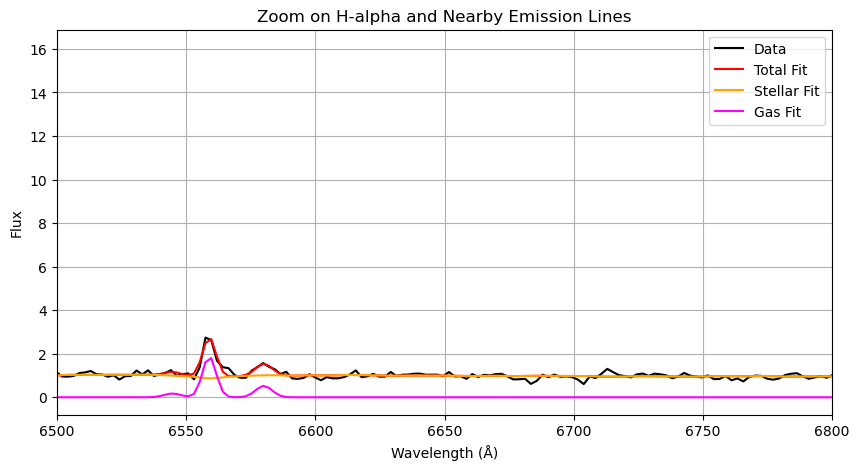

σ (km/s): 1.02

Window centre: 186


σ (km/s): 1.02

Window centre: 187


σ (km/s): 1.02

Window centre: 188


σ (km/s): 32.81

Window centre: 189


σ (km/s): 37.06

Window centre: 190


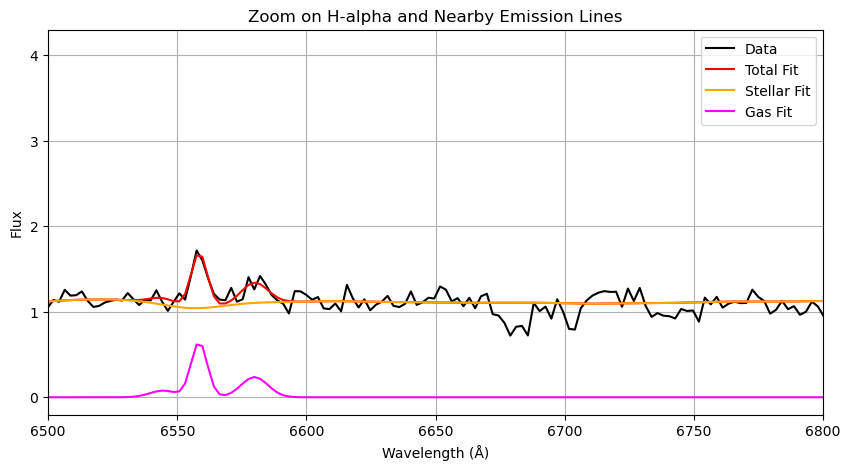

σ (km/s): 77.28

Window centre: 191


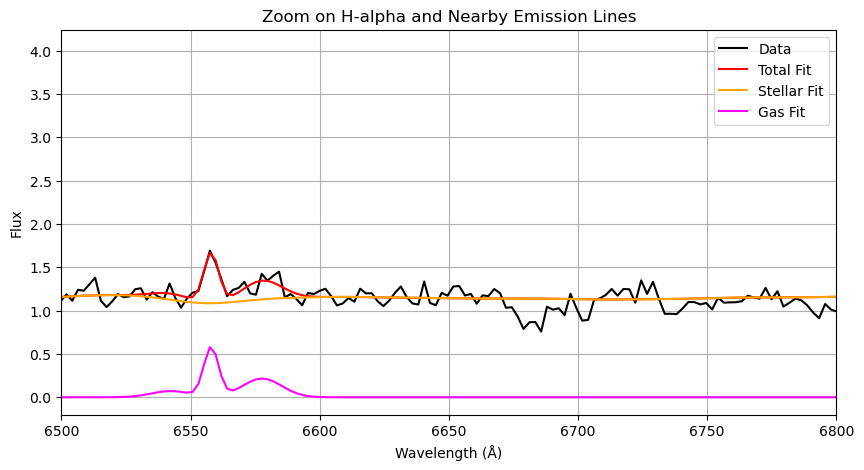

σ (km/s): 49.71

Window centre: 192


σ (km/s): 1.02

Window centre: 193


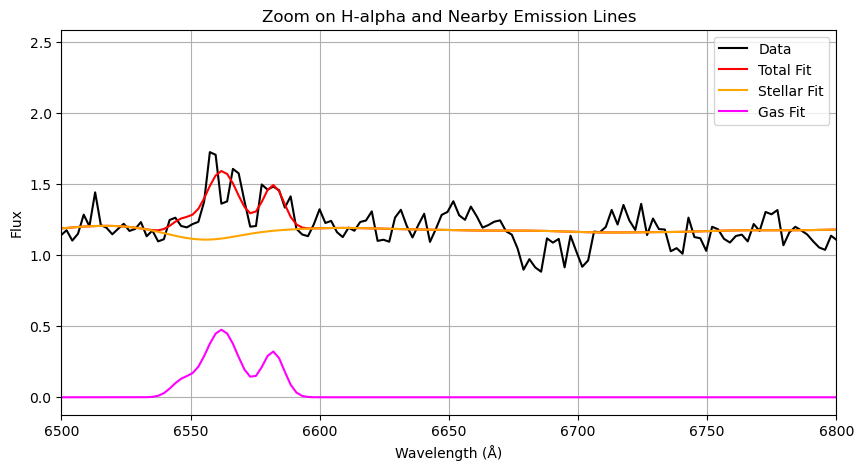

σ (km/s): 270.20

Window centre: 194


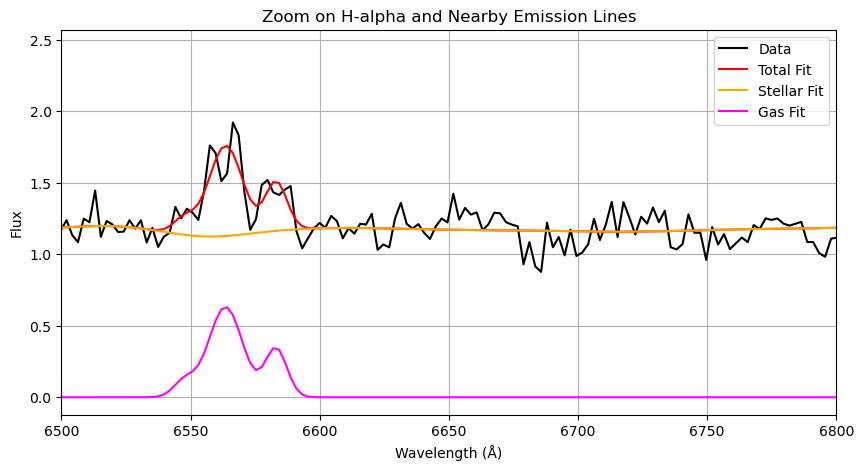

σ (km/s): 274.74

Window centre: 195


σ (km/s): 231.78

Window centre: 196


σ (km/s): 196.24

Window centre: 197


σ (km/s): 175.04

Window centre: 198


σ (km/s): 164.91

Window centre: 199


σ (km/s): 159.51

Window centre: 200


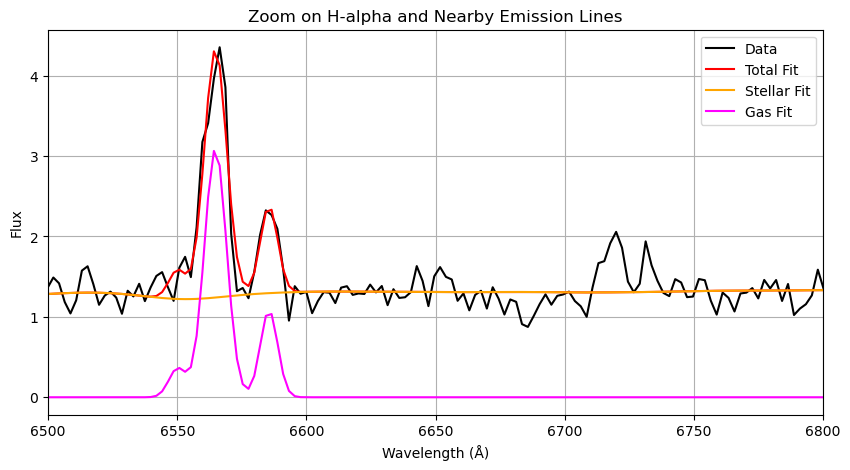

σ (km/s): 155.12

Window centre: 201


σ (km/s): 155.13

Window centre: 202


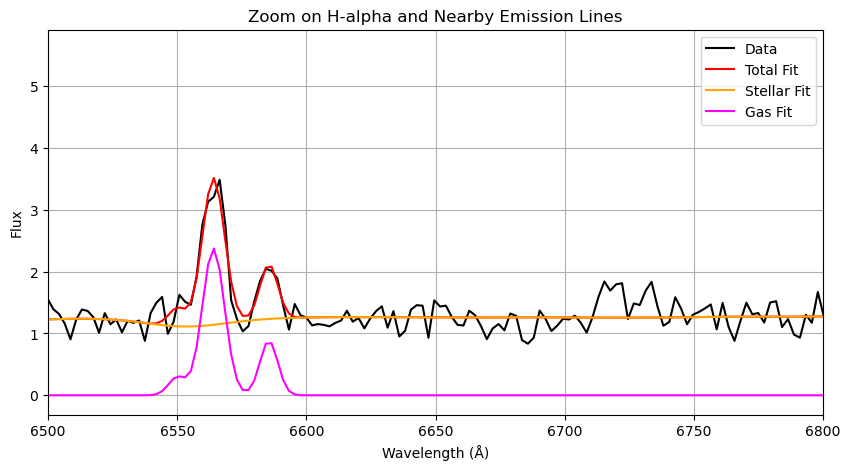

σ (km/s): 154.72

Window centre: 203


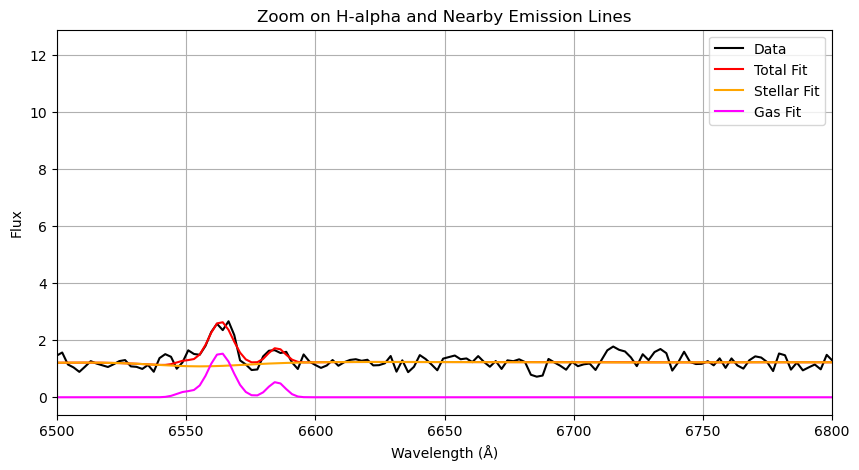

σ (km/s): 180.69

Window centre: 204


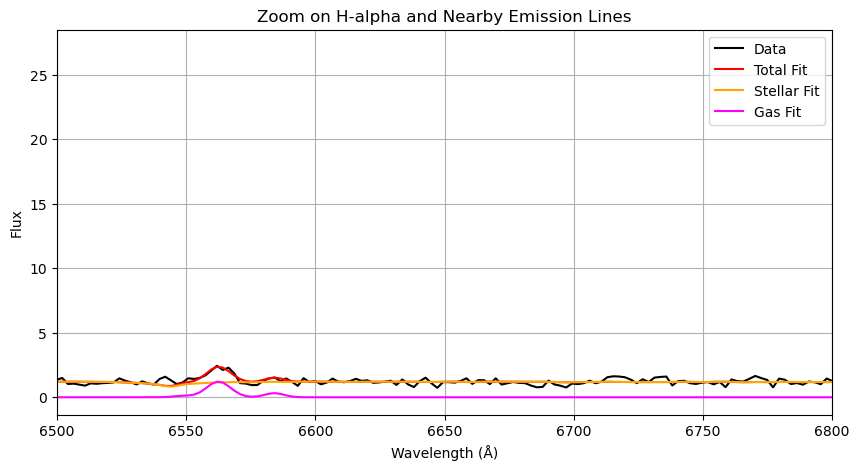

σ (km/s): 175.36

Window centre: 205


σ (km/s): 182.76

Window centre: 206


σ (km/s): 212.97

Window centre: 207


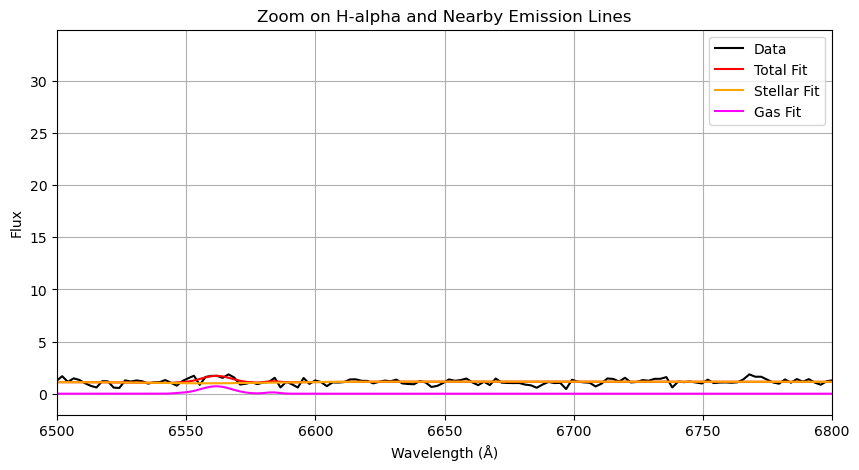

σ (km/s): 246.66

Window centre: 208


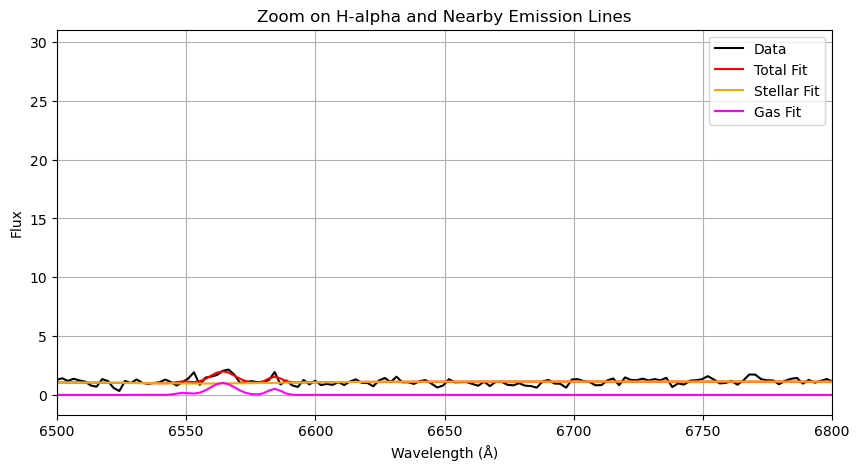

σ (km/s): 181.66

Window centre: 209


σ (km/s): 100.48

Window centre: 210


σ (km/s): 71.99

Window centre: 211


σ (km/s): 86.27

Window centre: 212


σ (km/s): 61.63

Window centre: 213


σ (km/s): 78.16

Window centre: 214


σ (km/s): 60.17

Window centre: 215


σ (km/s): 103.91

Window centre: 216


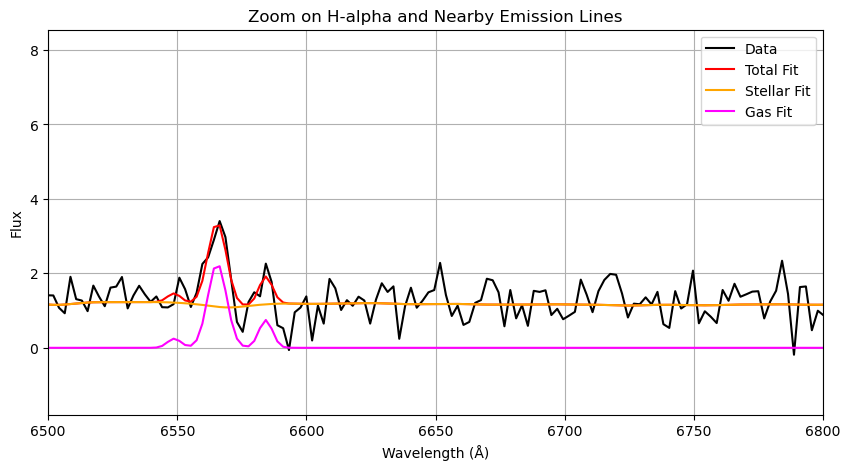

σ (km/s): 113.87

Window centre: 217


σ (km/s): 140.68

Window centre: 218


σ (km/s): 132.67

Window centre: 219


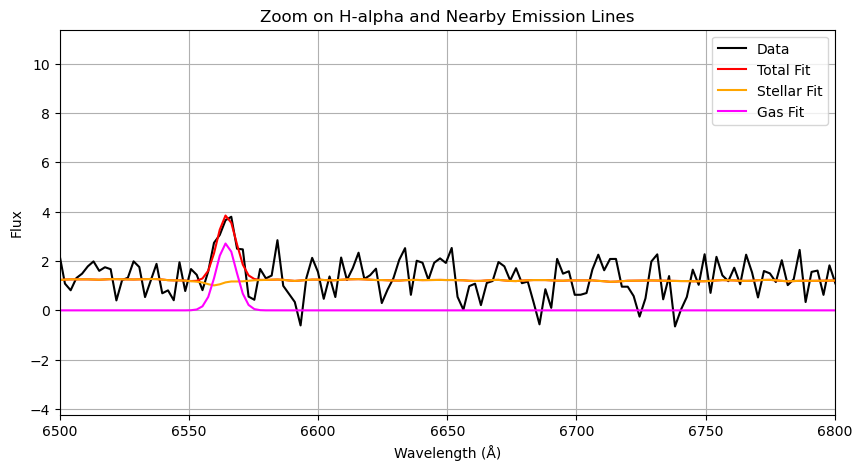

σ (km/s): 129.49

Window centre: 220


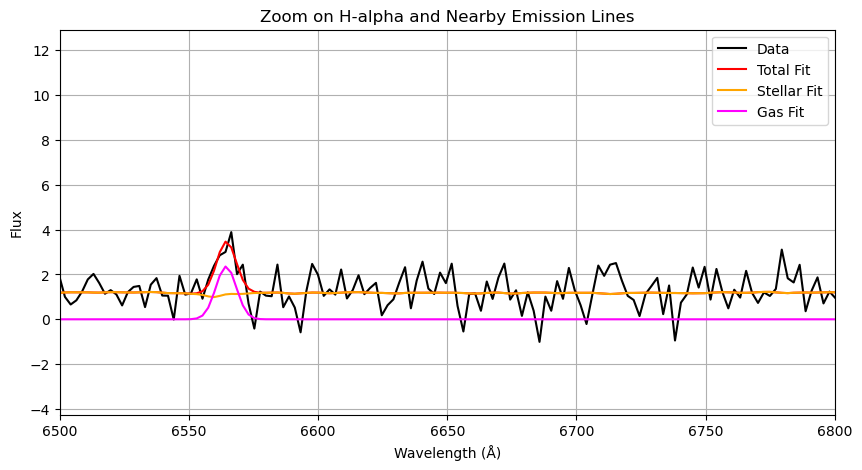

σ (km/s): 135.56

Window centre: 221


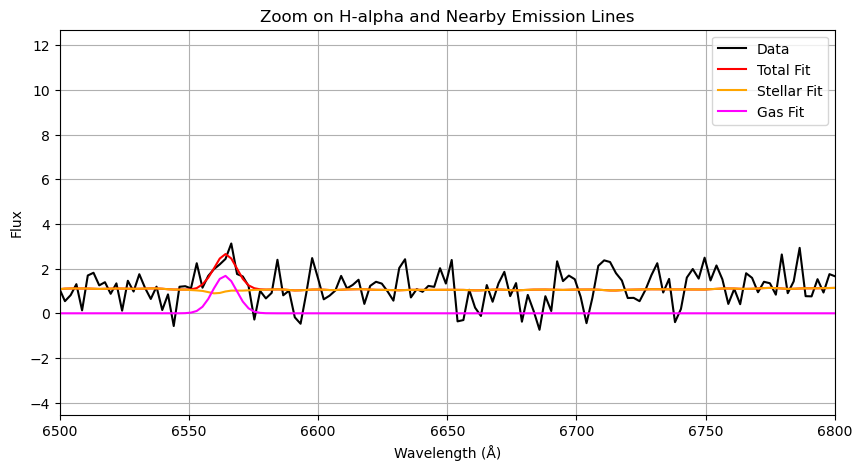

σ (km/s): 171.90

Window centre: 222


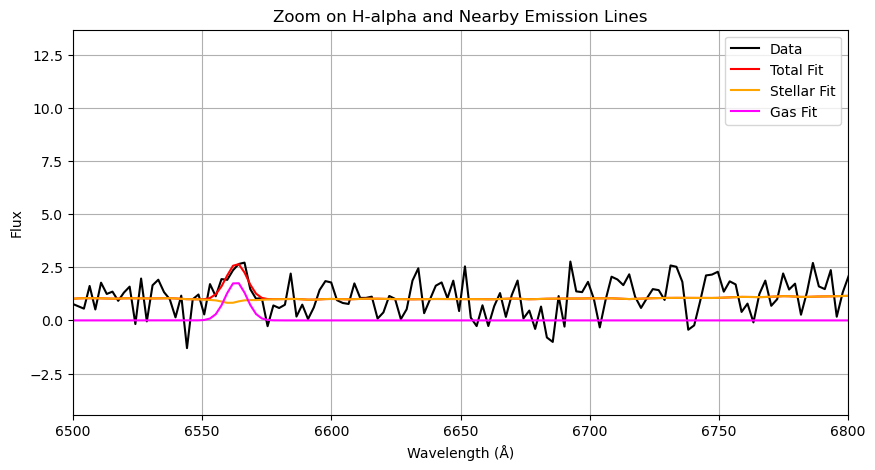

σ (km/s): 143.47

Window centre: 223


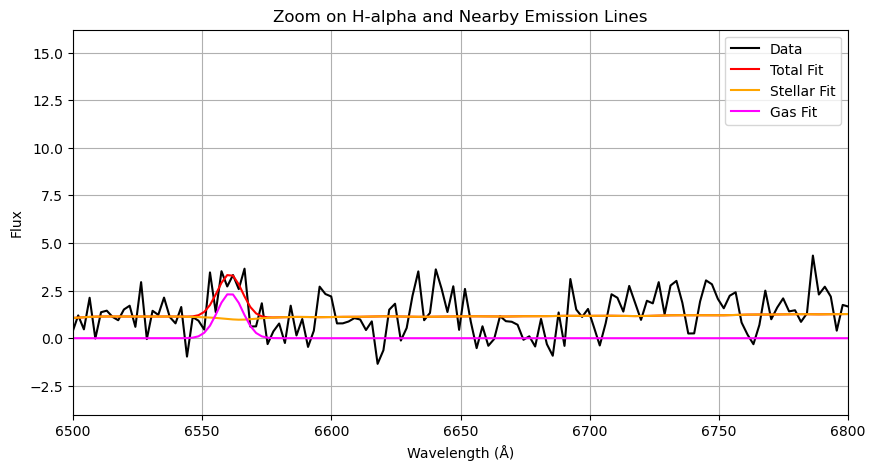

σ (km/s): 186.72

Window centre: 224


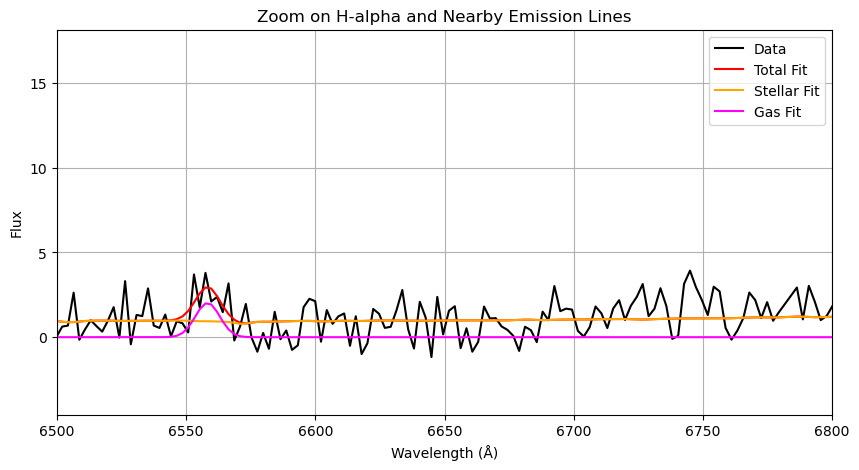

σ (km/s): 179.27

Window centre: 225


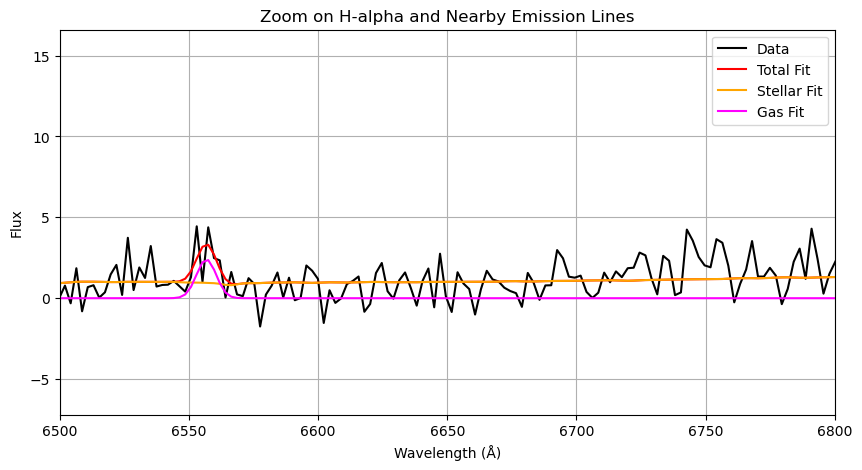

σ (km/s): 124.43

Window centre: 226


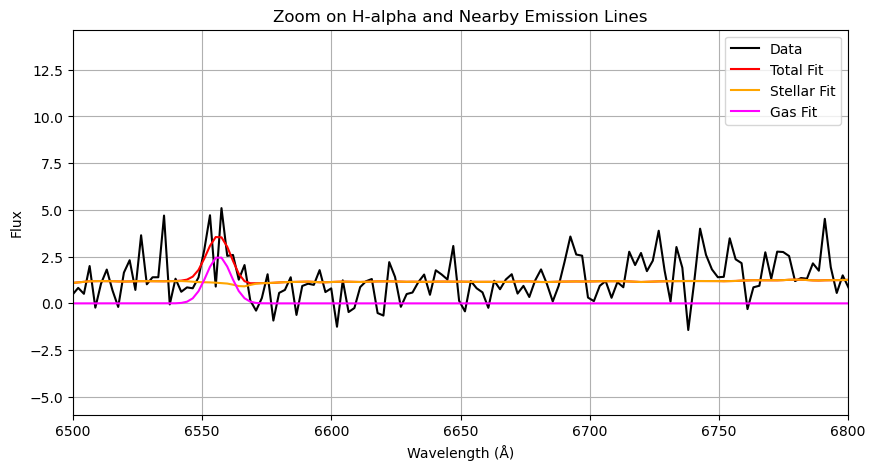

σ (km/s): 181.07

Window centre: 227


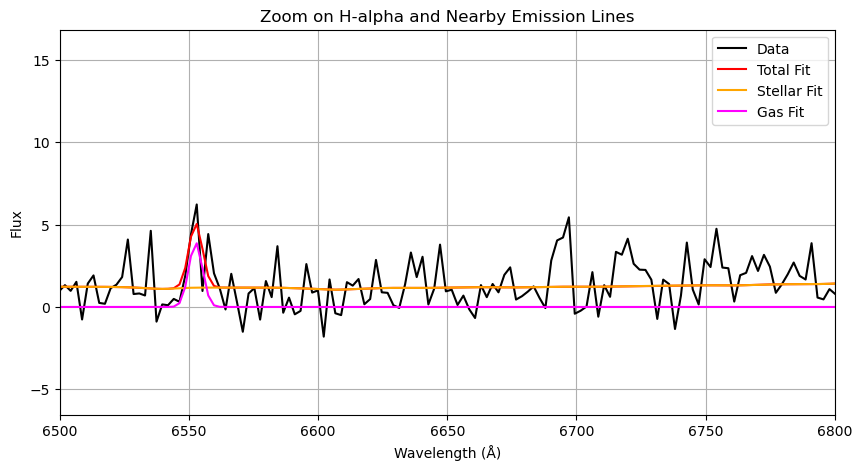

σ (km/s): 1.02

Window centre: 228


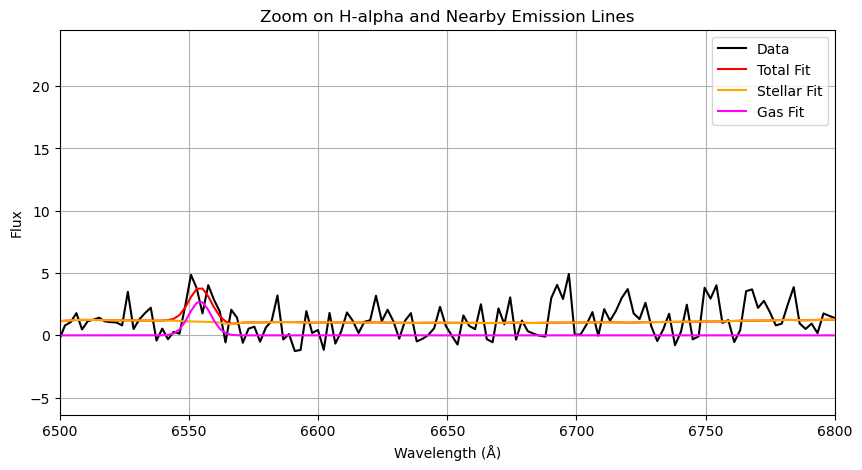

σ (km/s): 151.66

Window centre: 229


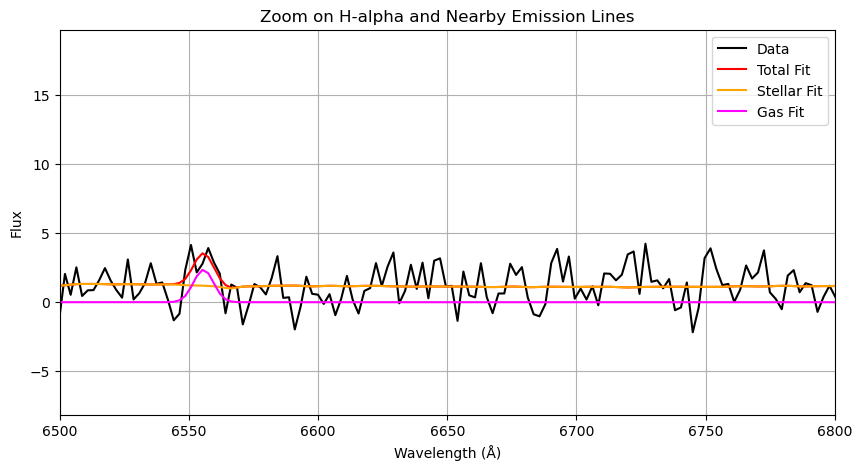

σ (km/s): 131.14

Window centre: 230


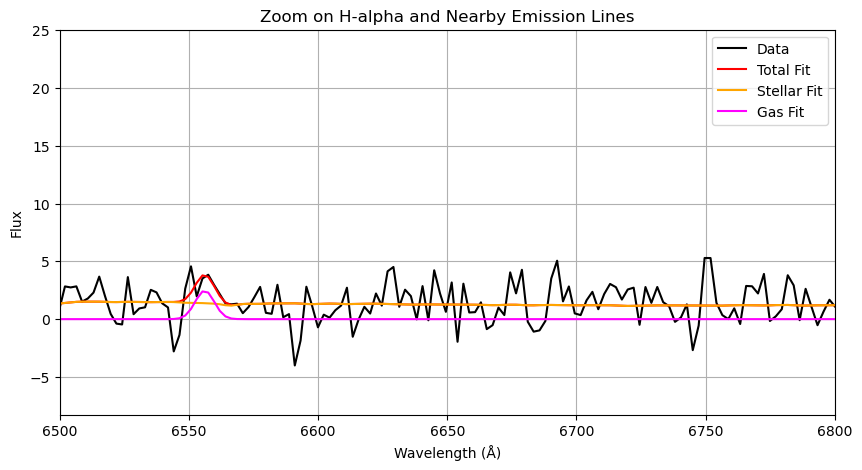

σ (km/s): 119.70

Window centre: 231


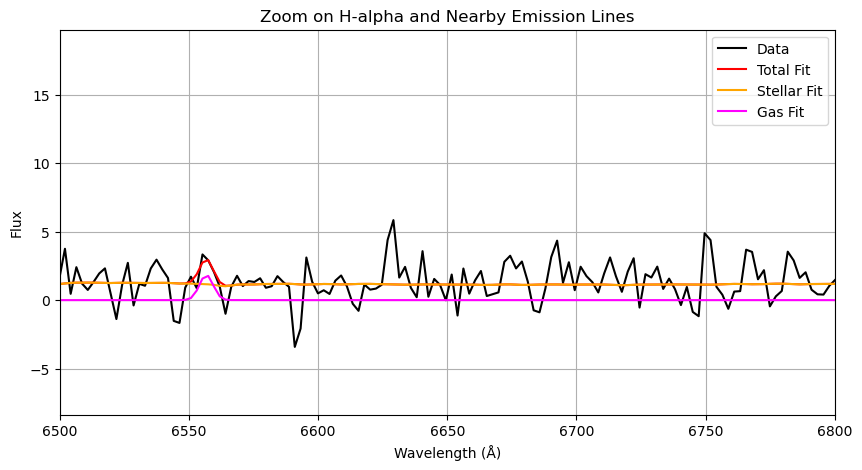

σ (km/s): 21.02

Window centre: 232


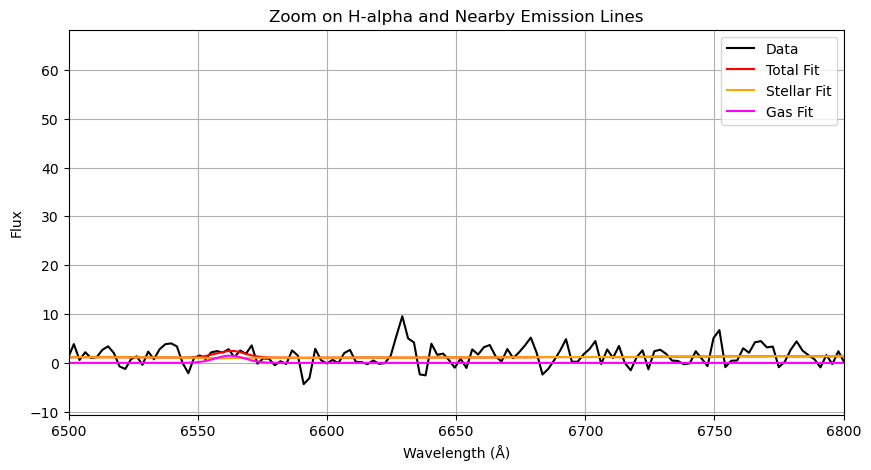

σ (km/s): 231.85

Window centre: 233


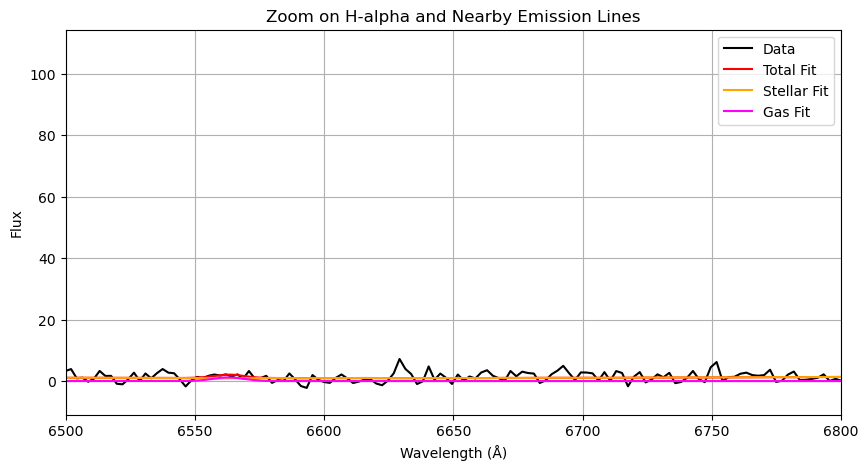

σ (km/s): 247.72

Window centre: 234


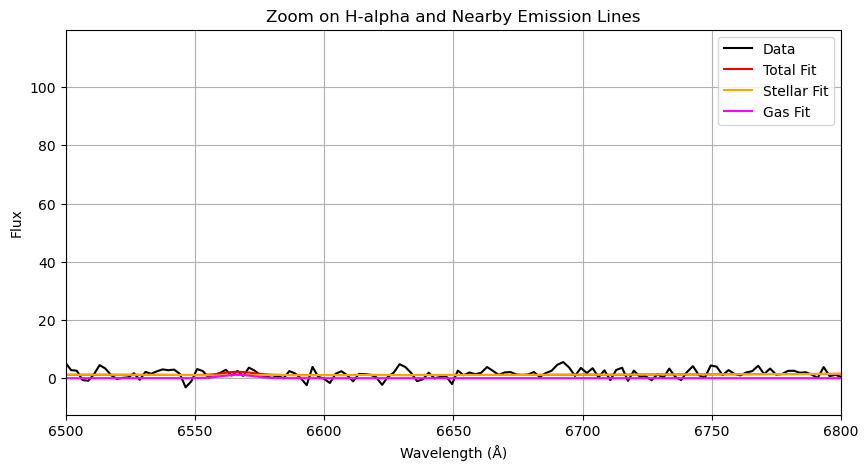

σ (km/s): 247.68

Window centre: 235


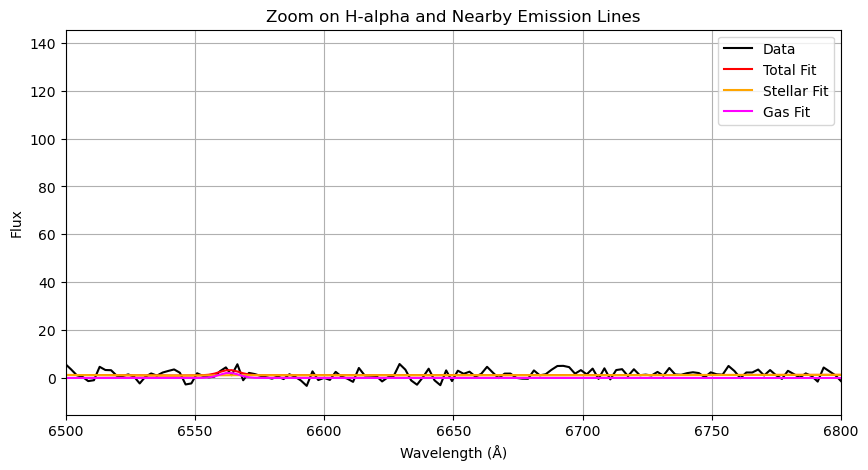

σ (km/s): 122.55

Window centre: 236


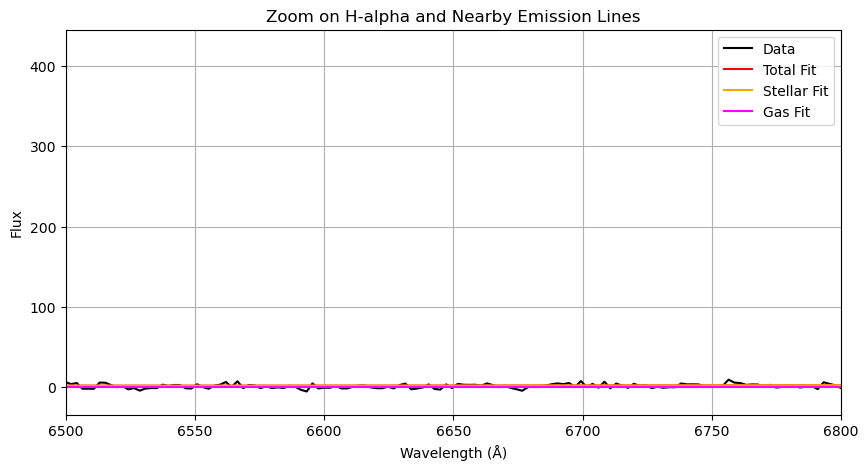

σ (km/s): 1000.00

Window centre: 237


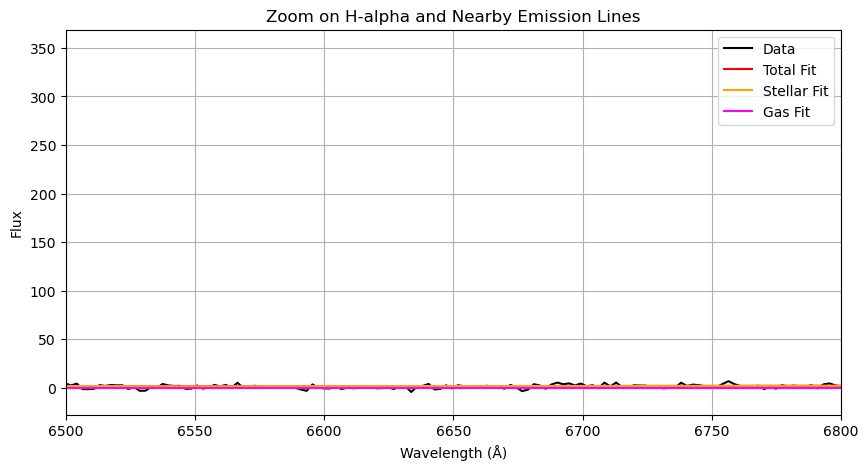

σ (km/s): 1.02

Window centre: 238


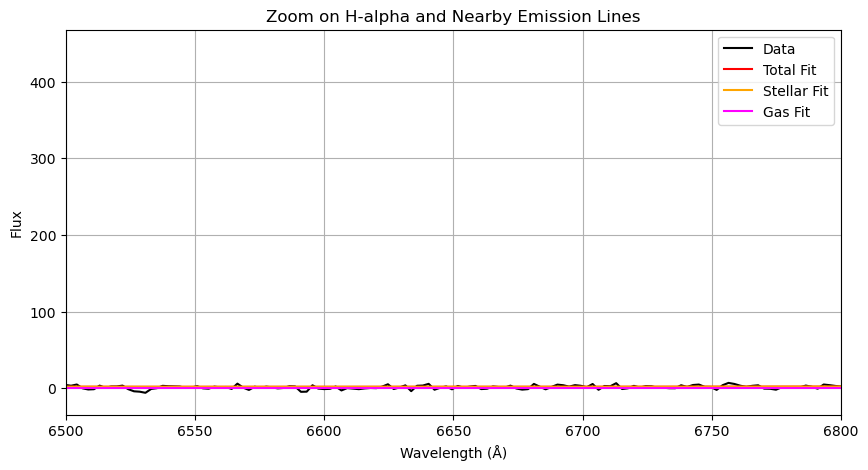

σ (km/s): 64.80

Window centre: 239


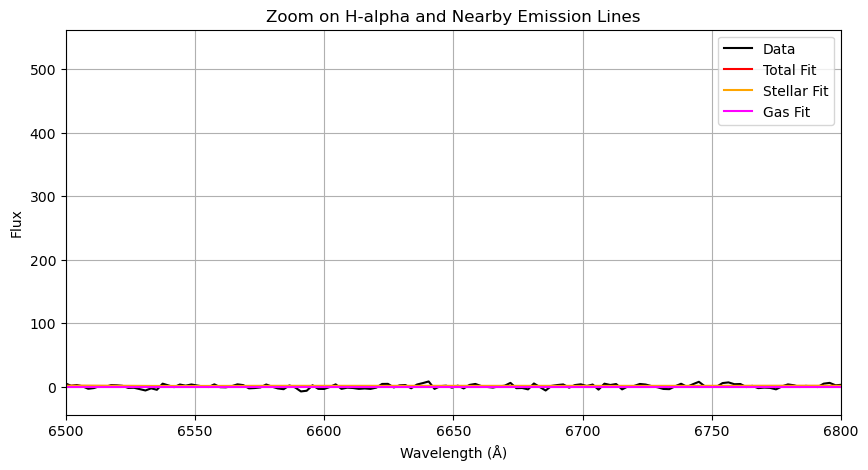

σ (km/s): 1000.00

Window centre: 240


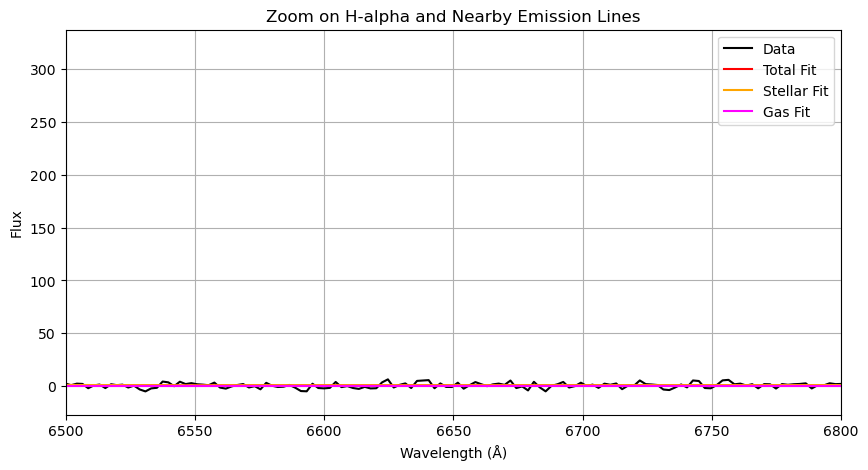

σ (km/s): 200.00

Window centre: 241


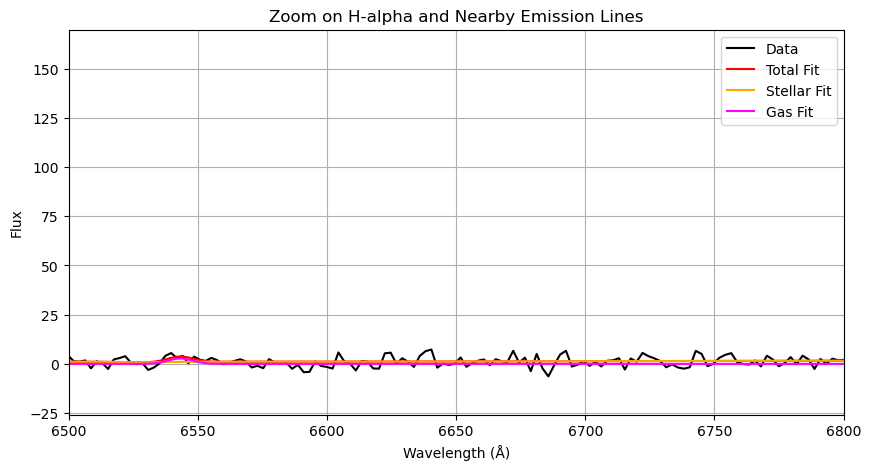

σ (km/s): 181.00

Window centre: 242


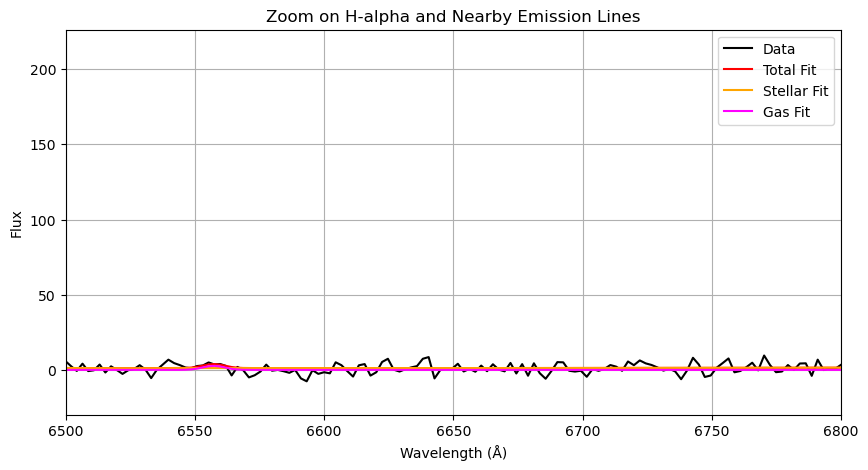

σ (km/s): 151.30

Window centre: 243


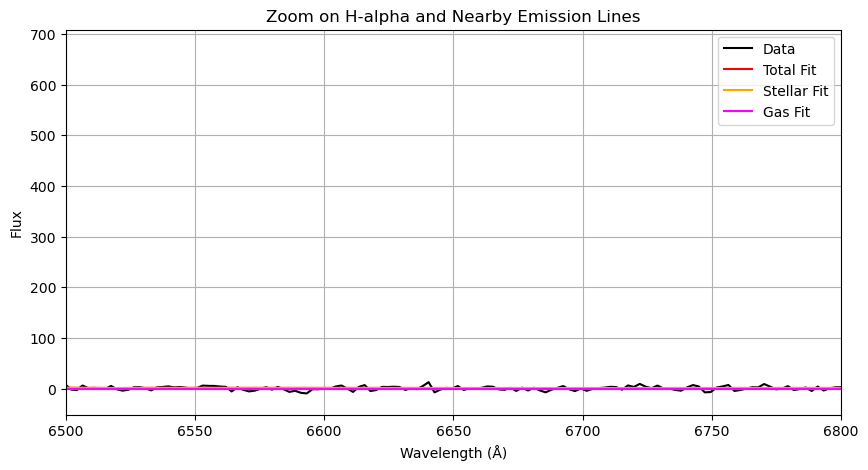

σ (km/s): 1000.00

Window centre: 244


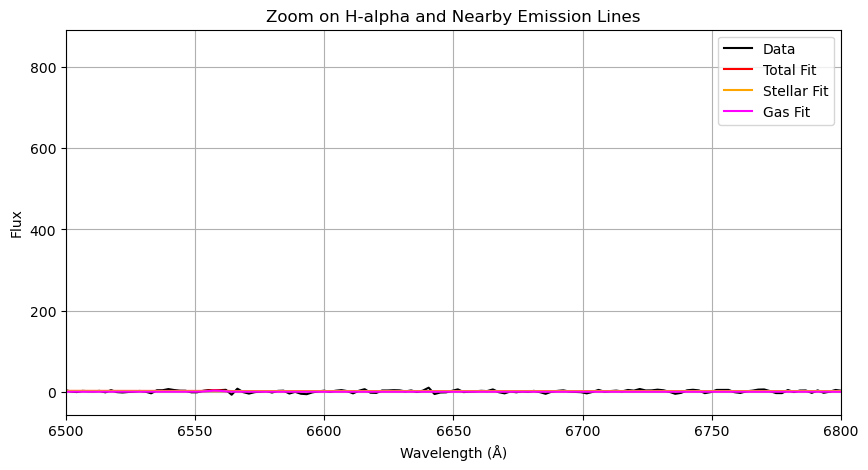

σ (km/s): 1.02

Window centre: 245


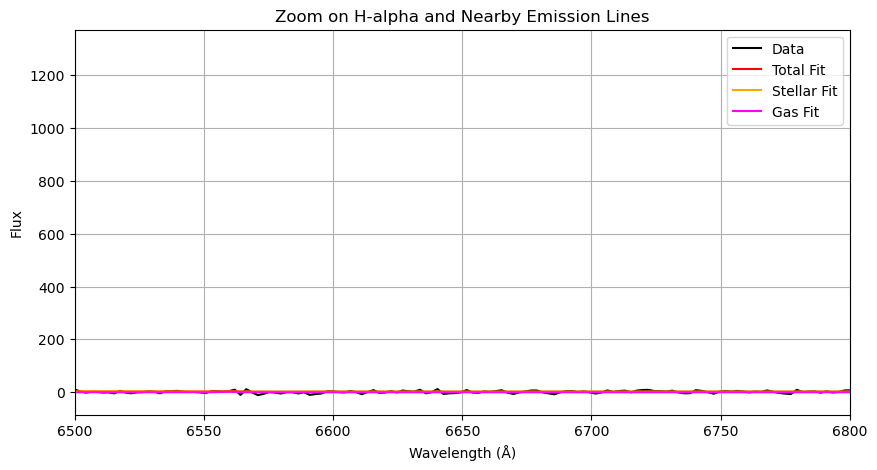

σ (km/s): 1.02

Window centre: 246


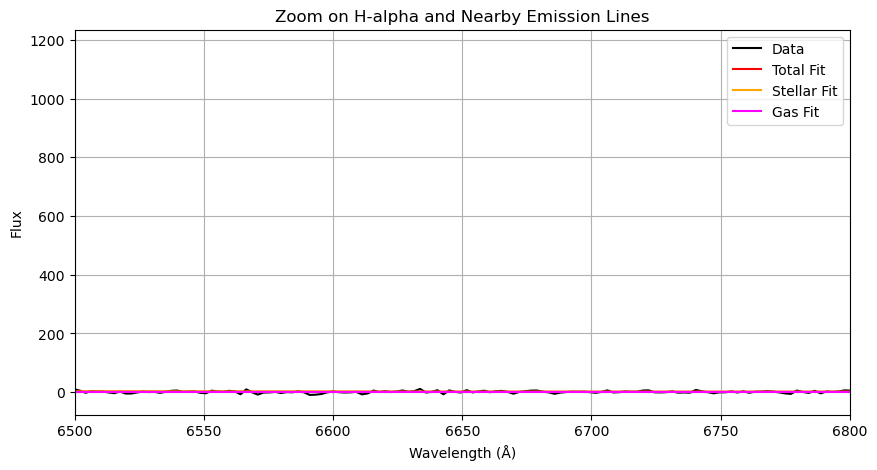

σ (km/s): 196.60

Window centre: 247


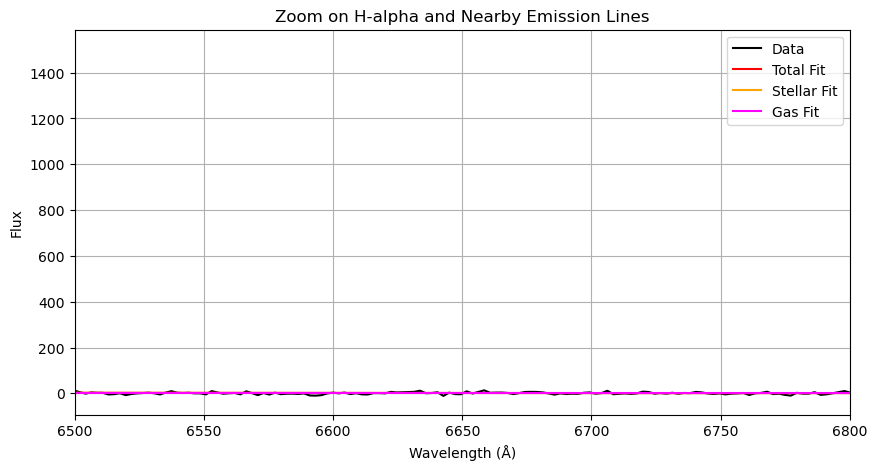

σ (km/s): 200.00



In [4]:
for center, df_rb, pp in results[25:100]:
    # Ensure the function can access 'lam'
    lam_array = df_rb['lam'].values
    plot_ppxf.__globals__['lam'] = lam_array

    print(f"Window centre: {center}")
    plot_ppxf(df_rb, pp)

    # Extract and print the Hα sigma (km/s)
    sigma = pp.sol[1][1]
    print(f"σ (km/s): {sigma:.2f}\n")

In [5]:
centers     = []
velocities  = []; v_errs     = []
dispersions = []; sigma_errs = []
EWs         = []; EW_errs    = []

for center, _, pp in results:
    # --- extract Hα kinematics from the list ---
    sol_gas    = pp.sol[1]
    err_gas    = pp.error[1]
    v_ha, sigma_ha       = sol_gas
    #sigma = np.sqrt(sigma_inst**2 + sigma_ha**2)

    v_ha_err, sigma_ha_err = err_gas

    # find Hα in gas_names (should be idx 0 here)
    idx = np.where(pp.gas_names == "Halpha")[0][0]

    # compute flux, continuum & EW as before
    flux_ha   = pp.gas_flux[idx]
    continuum = pp.bestfit - pp.gas_bestfit
    peak_i    = np.argmax(pp.gas_bestfit_templates[:, idx])
    cont0     = continuum[peak_i]
    cont_err  = pp.noise[peak_i]
    flux_err  = pp.gas_flux_error[idx]

    EW        = flux_ha / cont0
    EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)

    # store
    centers.append(center)
    velocities.append(v_ha)
    v_errs.append(v_ha_err)
    dispersions.append(sigma_ha)
    sigma_errs.append(sigma_ha_err)
    EWs.append(EW)
    EW_errs.append(EW_err)


/var/folders/r3/l94405xd0mq2s62v2swzjq2m0000gn/T/ipykernel_28243/3518839896.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)
/var/folders/r3/l94405xd0mq2s62v2swzjq2m0000gn/T/ipykernel_28243/3518839896.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)


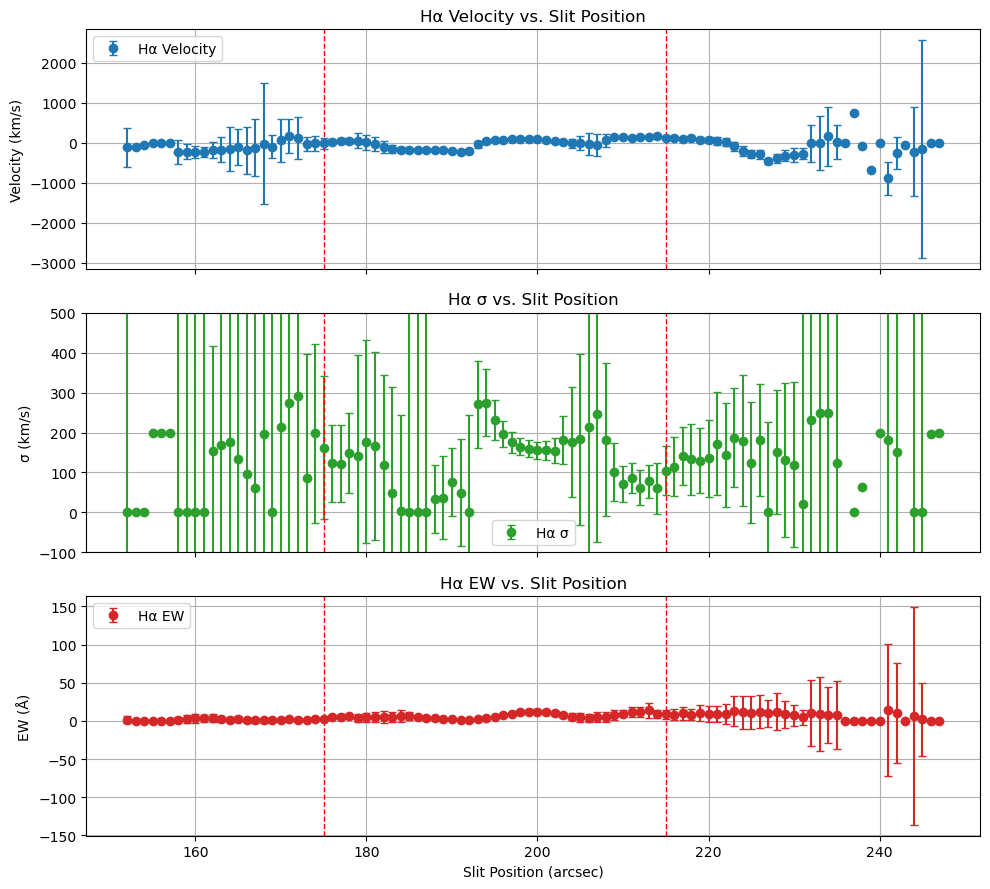

In [6]:
fig, axs = plt.subplots(3,1,figsize=(10,9),sharex=True)

colors = ['#1f77b4', '#2ca02c', '#d62728']  # blue, green, red


# Velocity
axs[0].errorbar(centers, velocities, yerr=v_errs,
                fmt='o', ecolor=colors[0], color=colors[0],
                capsize=3, label='Hα Velocity')
axs[0].set_ylabel("Velocity (km/s)")
axs[0].set_title("Hα Velocity vs. Slit Position")
axs[0].axvline(175, color='red', ls='--', lw=1)
axs[0].axvline(215, color='red', ls='--', lw=1)
axs[0].legend(); axs[0].grid(True)

# Dispersion
axs[1].errorbar(centers, dispersions, yerr=sigma_errs,
                fmt='o', ecolor=colors[1], color=colors[1],
                capsize=3, label='Hα σ')
axs[1].set_ylim(-100,500)
axs[1].set_ylabel("σ (km/s)")
axs[1].set_title("Hα σ vs. Slit Position")
axs[1].axvline(175, color='red', ls='--', lw=1)
axs[1].axvline(215, color='red', ls='--', lw=1)
axs[1].legend(); axs[1].grid(True)

# Equivalent Width
axs[2].errorbar(centers, EWs, yerr = EW_errs,
                fmt='o', ecolor=colors[2], color=colors[2],
                capsize=3, label='Hα EW')
axs[2].set_ylabel("EW (Å)")
axs[2].set_xlabel("Slit Position (arcsec)")
axs[2].set_title("Hα EW vs. Slit Position")
axs[2].axvline(175, color='red', ls='--', lw=1)
axs[2].axvline(215, color='red', ls='--', lw=1)
axs[2].legend(); axs[2].grid(True)

plt.tight_layout()
plt.show()


In [7]:
df = pd.DataFrame({
    'center':        centers,
    'velocity':      velocities,
    'velocity_err':  v_errs,
    'dispersion':    dispersions,
    'dispersion_err': sigma_errs,
    'EW':            EWs,
    'EW_err':        EW_errs
})

# Save to CSV
df.to_csv('../halpha results/WB1_halpha_results.csv', index=False)
